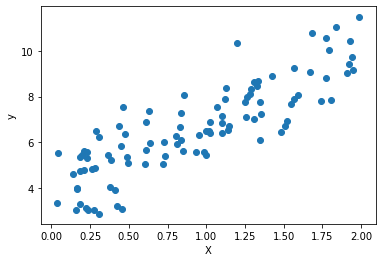

In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()